<a href="https://colab.research.google.com/github/Sandoval-Martinez-Jacquelin/Metodos-1/blob/main/Polinomio_de_Hermite%20con%20SYMPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polinomio de Hermite con Sympy**

In [45]:
import numpy as np
from numpy import array

from numpy import zeros
from tabulate import tabulate
from math import *

In [46]:
#Ingreso de los datos de la columna  X
n=3#int(input("Ingrese el numero de datos "))
datx=zeros(n) #creacion de un arreglo inicializado en ceros ,para añadir los datos de la columna x
#for i in range(n):
  #a=input("Ingrese dato para x ")
  #datx[i]=a

datx=array([1.3,1.6,1.9])#ingreso de los datos de x para el ejemplo

In [47]:
#Ingreso de los datos de la columna f(x)
#daty=zeros(n)
#for i in range(n):
  #a=input("Ingrese f(x) ")
  #daty[i]=a

daty=array([0.6200860,0.4554022,0.2818186])#ingreso de los datos de f(x) para el ejemplo

In [48]:
#Ingreso de los datos de la columna f´(x)
#der=zeros(n)
#for i in range(n):
  #a=input("Ingrese f´(x) ")
  #der[i]=a

der=array([-0.5220232,-0.5698959,-0.5811571])#ingreso de los datos de f´(x) para el ejemplo

In [49]:
x0=1.5#float(input("Ingrese el valor que desea aproximar"))

In [50]:
#Imprimimos la tabla con los valores x , f(x),f´(x) dados
dic={"datox":datx,"datoy":daty,"derivada":der}
print(tabulate(dic,headers=['X',"f(x)","f´(x)"],floatfmt='.7f'))

        X       f(x)       f´(x)
---------  ---------  ----------
1.3000000  0.6200860  -0.5220232
1.6000000  0.4554022  -0.5698959
1.9000000  0.2818186  -0.5811571


In [51]:
#creacion de un arreglo inicializado en 0 ,para los valores de z
z=zeros(2*n)

Q=list(zeros(2*(n)))#creacion de lista vacia para los valores de Qi,0
Q1=list(zeros(2*(n)))#creacion de lista vacia para los valores de Qi,1

for i in range(n):
  #Asignacion de los valores de z
  z[2*i]=datx[i]
  z[2*(i)+1]=datx[i]
  #Asignacion de los valores de Qi,0
  Q[2*i]=daty[i]
  Q[2*(i)+1]=daty[i]
  #Asignacion de los valores de Qi,1
  Q1[2*(i)+1]=der[i]
  if i!=0:
    Q1[2*(i)]=(Q[2*i]-Q[2*(i)-1])/(z[2*i]-z[2*(i)-1])

Q1.pop(0)#Eliminamos el primer elemento de Qi,1




0.0

In [52]:
sub=[]#creamos una lista vacia para guardar los subindices de z
for s in range(2*n):#cilco iterativo para guardar los subindices de z y tabularlos
  sub.append(s)


In [53]:
dic2={"sub":sub,"z":z,0:Q,1:Q1}#Creamos un nuevo diccionario para tabular los datos de z,y los Qi,j

In [54]:
lista1=Q1#Guardamos los datos de Q1 en una nueva lista ,para trabajar con estos datos
lista2=[]#creacion de una lista vacia para ir almacenando los valores de Qi,j


#ciclo iterativo para obtener los coeficientes del polinomio de Hermite H(x)
for j in range(2,2*n):
  for i in range(j,2*n):
    val=(lista1[i-(j-1)]-lista1[i-j])/(z[i]-z[i-j])
    lista2.append(round(val,7))#se guardan los valores de Qi,j en la lista 2
  dic2.update({j:lista2})#se agregan los valores de Qi,j al diccionario 2 para poder tabularlos

  lista1=lista2#actualizacion de la lista 1,para trabajar con los datos de Qi,j ya calculados
  lista2=[]#se convierte la lista 2 a lista vacia para almacenar nuevos datos de Qi,j



In [55]:
#Ciclo iterativo para asignar espacios vacios al principio de las columnas de Qi,j
for i in range(1,2*n):
  for k in range(0,i):
    dic2[i]=[0]+dic2.get(i)

In [56]:

titulos=["i","z","f(z)"]#se asignan los nombres a la columna de z, f(z) y los subindices i de z
for k in range(1,2*n):#Definimos los titulos para cada columna de la tabla
  titulos.append("Qi"+str(k))

In [57]:
#Creamos una lista vacia para guardar los coeficientes del polinomio de Hermite(Q0,0,Q1,1,...Q2n+1,2n+1)
cof=[]
#ciclo iterativo para obtener los coeficientes del diccionario 2
for m in range(2*n):
  a=dic2.get(m)
  cof.append(a[m])

In [58]:
import sympy as sp
x=sp.Symbol("x")
H=sp.Symbol("H") #creamos una variable para calcular el polinomio de Hermite

H=0


In [59]:
#Obtencion  de la expresion del  polinomio de hermite
mul=1#Creamos una variable para guardar la expresion (X-Z0)...(X-Zk-1)
mul2=[1] #Creamos una lista vacia para guardar la expresion  que va a ir tomando mul en el ciclo iterativo

#Ciclo iterativo para obtener la expresion de  (X-Z0)...(X-Zk-1)
for m in range(0,2*(n)-1):
  mul*=x-z[m]
  mul2.append(mul) #se guarda la expresion  que va   tomando mul en el ciclo iterativo

#Ciclo iterativo para el realizar la multiplicacion de los coeficientes Qi,j del polinomio por las expresiones de la lista mul2 obtenidos en el ciclo anterior
for m in range(2*n):
  H+=mul2[m]*cof[m]

#Al terminar este ciclo se obtiene el polinomio H(x) de hermite

In [60]:
(H).simplify()#se muestra el polinomio de Hermite obtenido

-0.0027738*x**5 + 0.02402456*x**4 - 0.014532782*x**3 - 0.2352534604*x**2 - 0.00819958060000008*x + 1.001934704328

In [61]:
Evaluacion=sp.lambdify(x,sp.simplify(H.simplify()))#creacion de la funcion "Evaluacion",para el calculo de H(x)

In [62]:
print(tabulate(dic2,headers=titulos,floatfmt='.7f'))#Imprimimos la tabla con los Qi,j

print("\n Los coeficientes del polinomio de Hermite son ")#Imprimimos los coeficientes de Hermite calculados
for m in range(2*n):#Ciclo iterativo para imprimir los coefcientes del polinomio de Hermite
  print("Q",str(m),str(m),"=",cof[m])

print("\n El polinomio de Hermite tiene la forma H(x)= ",(H).simplify())#Imprimimos la forma del polinomio de Hermite


print("\n El polinomio de Hermite evaluado en x= ",x0,"es igual a ",round(Evaluacion(x0),7))#imprimimos la evaluacion del polinomio H(x) de hermite en el punto dado x

  i          z       f(z)         Qi1         Qi2        Qi3        Qi4         Qi5
---  ---------  ---------  ----------  ----------  ---------  ---------  ----------
  0  1.3000000  0.6200860   0.0000000   0.0000000  0.0000000  0.0000000   0.0000000
  1  1.3000000  0.6200860  -0.5220232   0.0000000  0.0000000  0.0000000   0.0000000
  2  1.6000000  0.4554022  -0.5489460  -0.0897427  0.0000000  0.0000000   0.0000000
  3  1.6000000  0.4554022  -0.5698959  -0.0698330  0.0663657  0.0000000   0.0000000
  4  1.9000000  0.2818186  -0.5786120  -0.0290537  0.0679655  0.0026663   0.0000000
  5  1.9000000  0.2818186  -0.5811571  -0.0084837  0.0685667  0.0010020  -0.0027738

 Los coeficientes del polinomio de Hermite son 
Q 0 0 = 0.620086
Q 1 1 = -0.5220232
Q 2 2 = -0.0897427
Q 3 3 = 0.0663657
Q 4 4 = 0.0026663
Q 5 5 = -0.0027738

 El polinomio de Hermite tiene la forma H(x)=  -0.0027738*x**5 + 0.02402456*x**4 - 0.014532782*x**3 - 0.2352534604*x**2 - 0.00819958060000008*x + 1.001934704328

 El po

In [63]:
from math import *
import numpy as np
import matplotlib . pyplot as plt

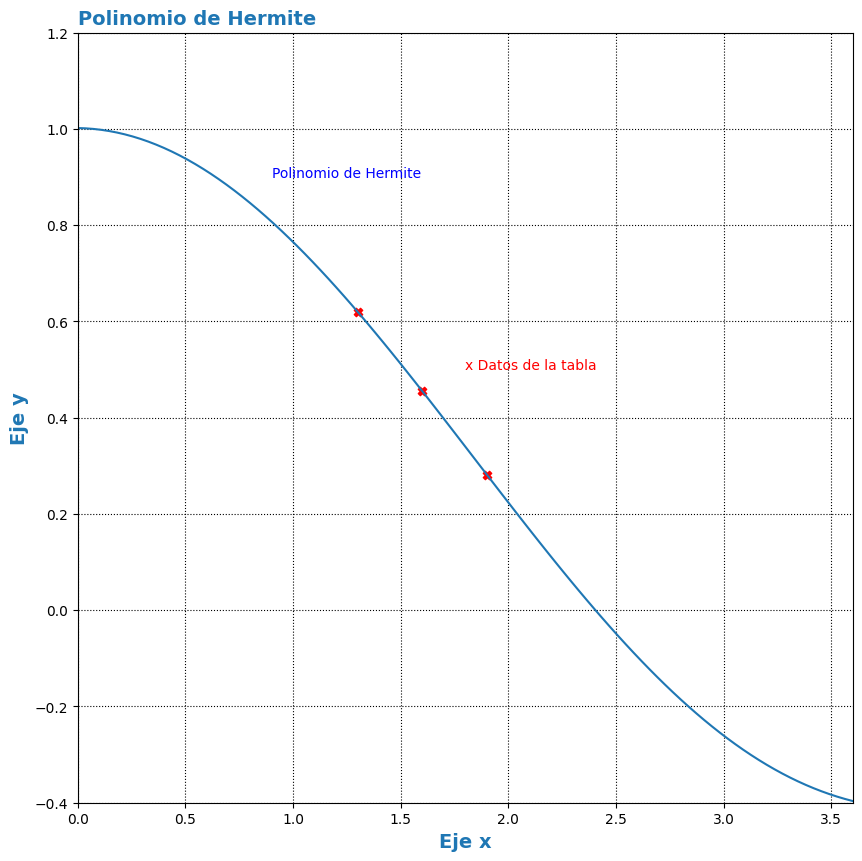

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

x=np.linspace(0, 3.6,100)

plt.plot(x,Evaluacion(x) )#se grafica la funcion g(x) en los datos de x dados
plt.scatter(datx,daty,color="red",marker="X")#se trazan los puntos para cada pareja ordenada (x,y) de la tabla
plt.xlim(0, 3.6)
plt.ylim(-0.4, 1.2)
plt.text(1.8, 0.5, "x Datos de la tabla", fontsize=10, color="r")
plt.text(0.9, 0.9, "Polinomio de Hermite", fontsize=10, color="b")
plt.title("Polinomio de Hermite ", loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.xlabel("Eje x",fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.ylabel("Eje y",fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.grid(color="black",linestyle="dotted")
plt.show()